In [1]:
import numpy as np
import cv2
from numpy import shape 
import random
import os
from PIL import Image

"""
#方法一，寄了
# 添加高斯噪声
def GaussianNoise(img, mean=0, var=1): 
    img = np.array(img/255, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, img.shape)
    out_img = img + noise
    if out_img.min() < 0:
        low_clip = -1
    else:
        low_clip = 0
        out_img = np.clip(out_img, low_clip, 1.0)
        out_img = np.uint8(out_img * 255)
    return out_img
"""


##方法三，没寄，调参数
def randomGaussian(image, mean=0.2, sigma=0.3):
    
        #对图像进行高斯噪声处理
        #:param image:
        #:return:
        
 
        def gaussianNoisy(im, mean=0.2, sigma=0.3):
         
            #对图像做高斯噪音处理
            #:param im: 单通道图像
            #:param mean: 偏移量
            #:param sigma: 标准差
            #:return:
          
            for _i in range(len(im)):
                im[_i] += random.gauss(mean, sigma)
            return im
 
        # 将图像转化成数组
        img = np.asarray(image)
        img.flags.writeable = True  # 将数组改为读写模式
        width, height = img.shape[:2]
        try:
            img_r = gaussianNoisy(img[:, :, 0].flatten(), mean, sigma)
            img_g = gaussianNoisy(img[:, :, 1].flatten(), mean, sigma)
            img_b = gaussianNoisy(img[:, :, 2].flatten(), mean, sigma)
            img[:, :, 0] = img_r.reshape([width, height])
            img[:, :, 1] = img_g.reshape([width, height])
            img[:, :, 2] = img_b.reshape([width, height])
        except:
            img = img
        return Image.fromarray(np.uint8(img))


"""
def GaussianNoise(image,percetage=0.05):
    G_Noiseimg = image.copy()
    w = image.shape[1]
    h = image.shape[0]
    G_NoiseNum=int(percetage*image.shape[0]*image.shape[1])
    for i in range(G_NoiseNum):
        temp_x = np.random.randint(0,h)
        temp_y = np.random.randint(0,w)
        G_Noiseimg[temp_x][temp_y][np.random.randint(3)] = np.random.randn(1)[0]
    return G_Noiseimg
"""

def operate(currentPath, filename, targetPath):
    # 读取图像
    image = Image.open(currentPath)
    image_cv = cv2.imread(currentPath)
    # image.show()
    #out_img = GaussianNoise(image_cv,2,4,0.25)  
    out_img =randomGaussian(image_cv)  
    #out_img =GaussianNoise(image_cv)
    #cv2.imwrite(targetPath+'/'+filename,out_img)
    out_img.save(targetPath+filename)


data_train = 'Alzheimer_s Dataset/train' 
for parent, dirnames, filenames in os.walk(data_train):
    for filename in filenames:
        # print('parent is:' + parent)
        print('filename is: ' + filename)
        dir = parent.split('\\')[-1]
        # 把文件名添加到一起后输出
        currentPath = os.path.join(parent, filename)
        print('the full name of file is :' + currentPath)
        # 保存处理后的图片的目标文件夹
        targetPath = f'Alzheimer_s Dataset/NB-train/gaussian_noise/{dir}/'
        # 进行处理
        operate(currentPath, filename, targetPath)

data_test = 'Alzheimer_s Dataset/test' 

"""
for parent, dirnames, filenames in os.walk(data_test):
    for filename in filenames:
        # print('parent is:' + parent)
        print('filename is: ' + filename)
        dir = parent.split('\\')[-1]
        # 把文件名添加到一起后输出
        currentPath = os.path.join(parent, filename)
        print('the full name of file is :' + currentPath)
        # 保存处理后的图片的目标文件夹
        targetPath = f'Alzheimer_s Dataset/NB-test/gaussian_noise/{dir}/'
        # 进行处理
        operate(currentPath, filename, targetPath)
"""


filename is: mildDem0.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem0.jpg
filename is: mildDem1.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem1.jpg
filename is: mildDem10.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem10.jpg
filename is: mildDem100.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem100.jpg
filename is: mildDem101.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem101.jpg
filename is: mildDem102.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem102.jpg
filename is: mildDem103.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem103.jpg
filename is: mildDem104.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem104.jpg
filename is: mildDem105.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem105.jpg
filename is: mildDem106.jpg
the full n

In [ ]:
train_root  = "Alzheimer_s Dataset/NB-train/gaussian_noise"
test_root ='Alzheimer_s Dataset/test' 

In [ ]:
batch_size = 5

from keras.preprocessing.image import ImageDataGenerator

Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (150, 150), batch_size=batch_size, shuffle= False)
test_data = Generator.flow_from_directory(test_root, (150, 150), batch_size=batch_size, shuffle= False)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


4


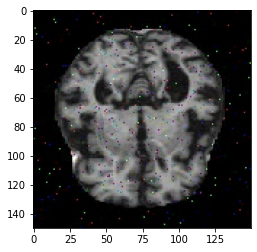

In [ ]:
import tensorflow as tf
from matplotlib.pyplot import imshow
import os

im = train_data[0][0][0]
img = tf.keras.preprocessing.image.array_to_img(im)
imshow(img)

num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)


In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(train_data, batch_size = batch_size, epochs=100)

Epoch 1/100
1025/1025 [==============================] - 287s 275ms/step - loss: 2.2723 - accuracy: 0.4458
Epoch 2/100
1025/1025 [==============================] - 276s 269ms/step - loss: 1.0616 - accuracy: 0.4897
Epoch 3/100
1025/1025 [==============================] - 275s 268ms/step - loss: 1.0459 - accuracy: 0.5003
Epoch 4/100
1025/1025 [==============================] - 272s 265ms/step - loss: 1.0416 - accuracy: 0.4981
Epoch 5/100
1025/1025 [==============================] - 271s 264ms/step - loss: 1.0480 - accuracy: 0.4993
Epoch 6/100
1025/1025 [==============================] - 253s 247ms/step - loss: 1.0412 - accuracy: 0.4938
Epoch 7/100
1025/1025 [==============================] - 235s 229ms/step - loss: 1.0764 - accuracy: 0.4952
Epoch 8/100
1025/1025 [==============================] - 251s 245ms/step - loss: 1.0402 - accuracy: 0.4985
Epoch 9/100
1025/1025 [==============================] - 263s 257ms/step - loss: 1.4103 - accuracy: 0.4835
Epoch 10/100
1025/1025 [=============

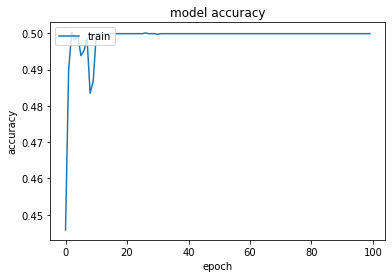

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

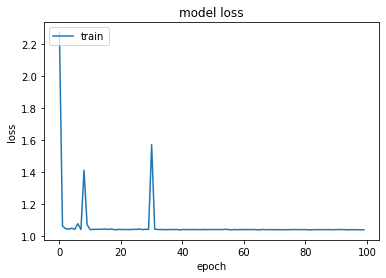

In [ ]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

256/256 [==============================] - 8s 32ms/step


<AxesSubplot:>

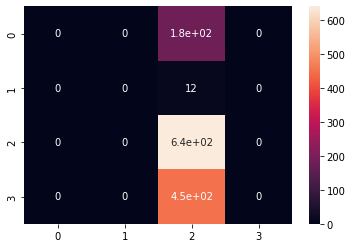

In [ ]:
import seaborn as sns
import numpy as np 
predict_x = model.predict(test_data) 
pred=np.argmax(predict_x,axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data.classes, pred)
sns.heatmap(cm, annot=True)

In [ ]:
print((cm[0,0]+cm[1,1])/(sum(sum(cm))))

0.0


In [ ]:
from keras.models import Model


def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_data[10][0][0].reshape(1,150,150,3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

1/1 [==============================] - 0s 149ms/step


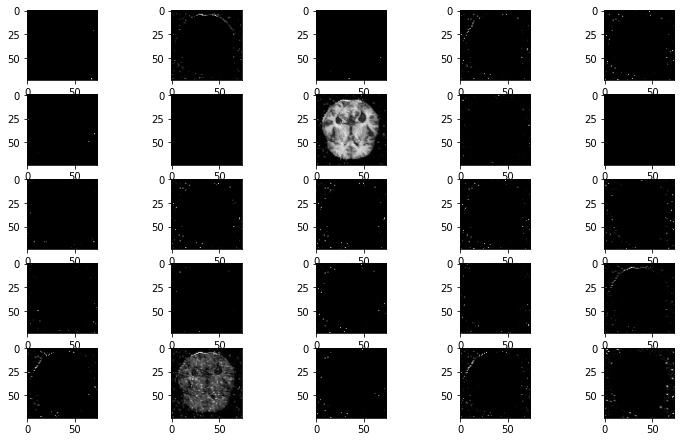

In [ ]:
display_activation(activations, 5, 5, 1)